In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Charge Transfer Resistance')

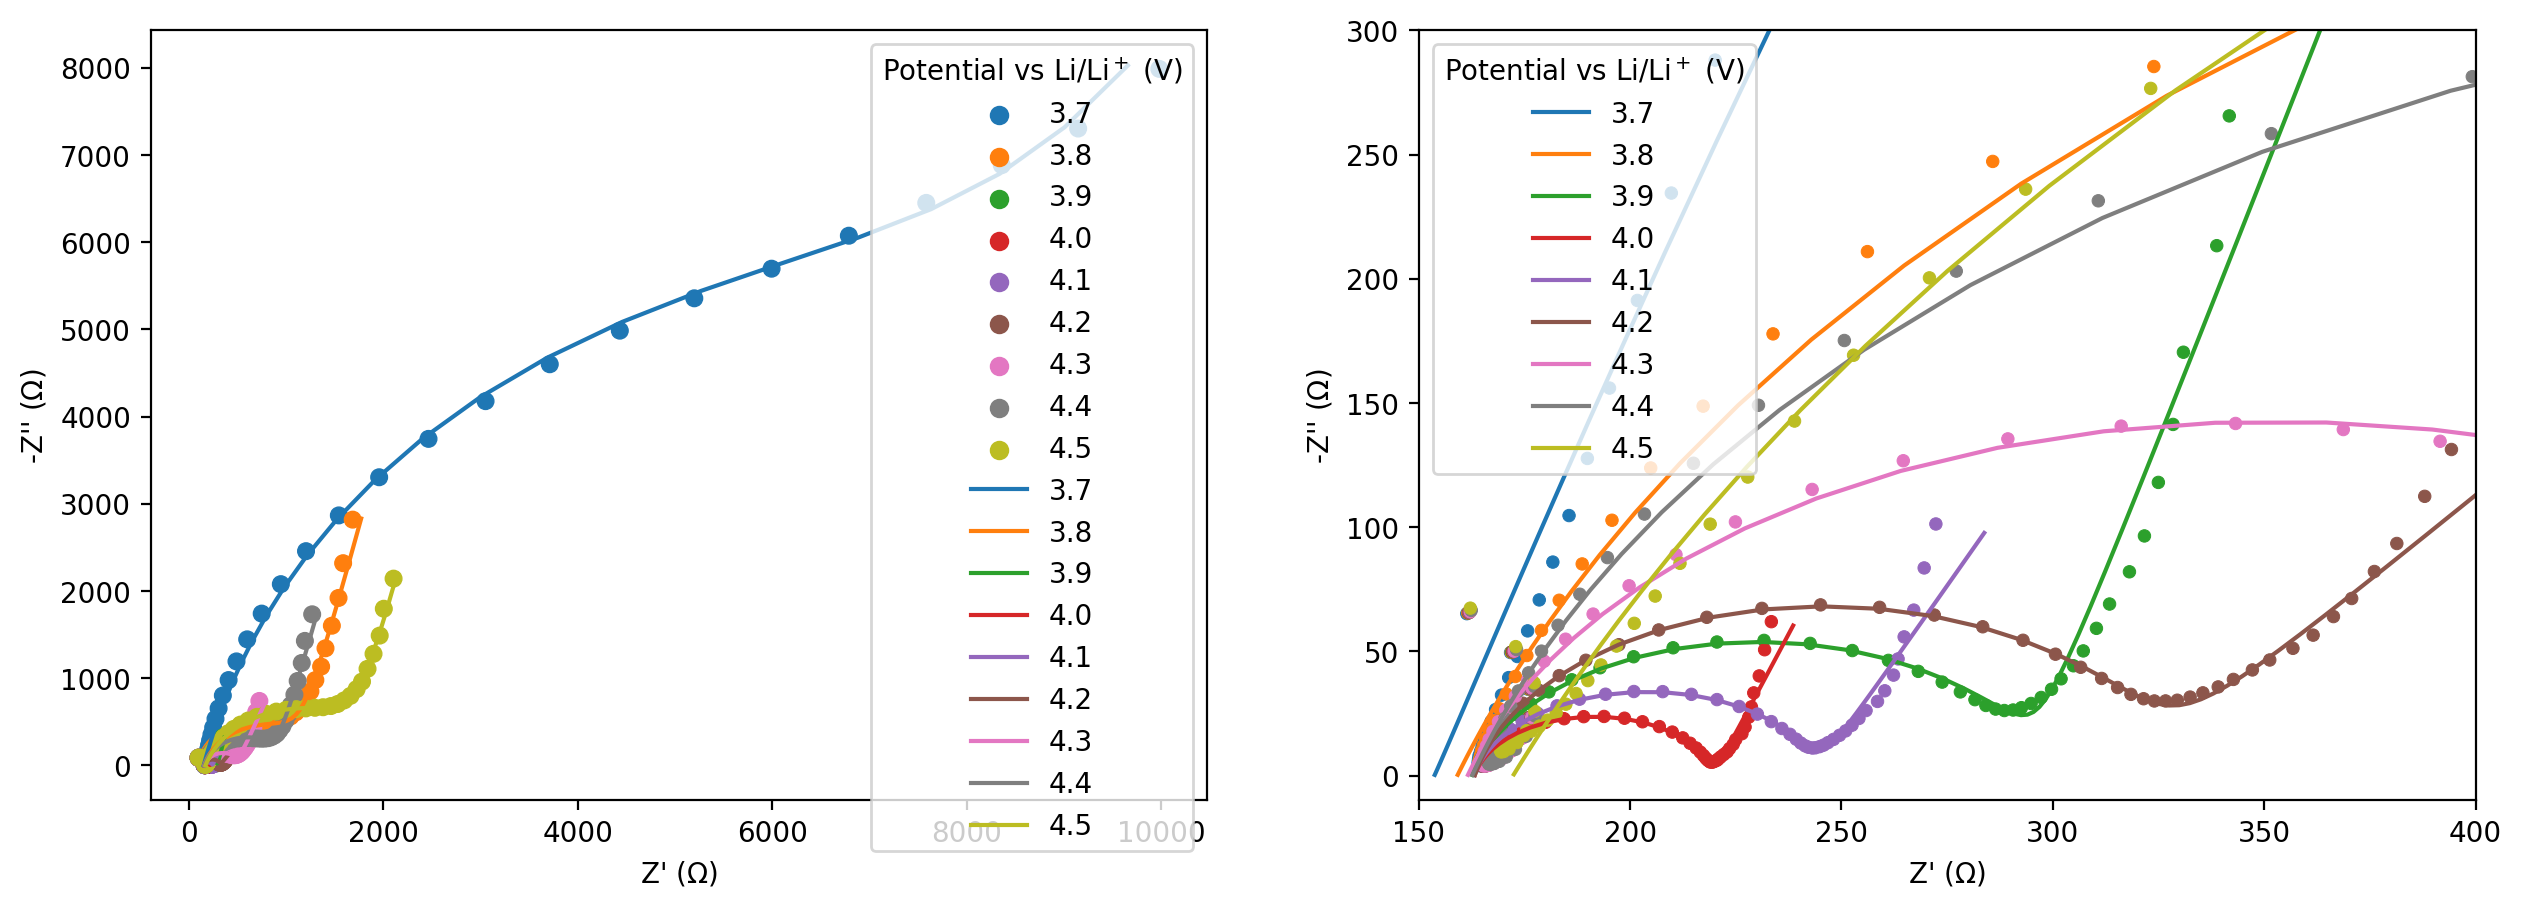

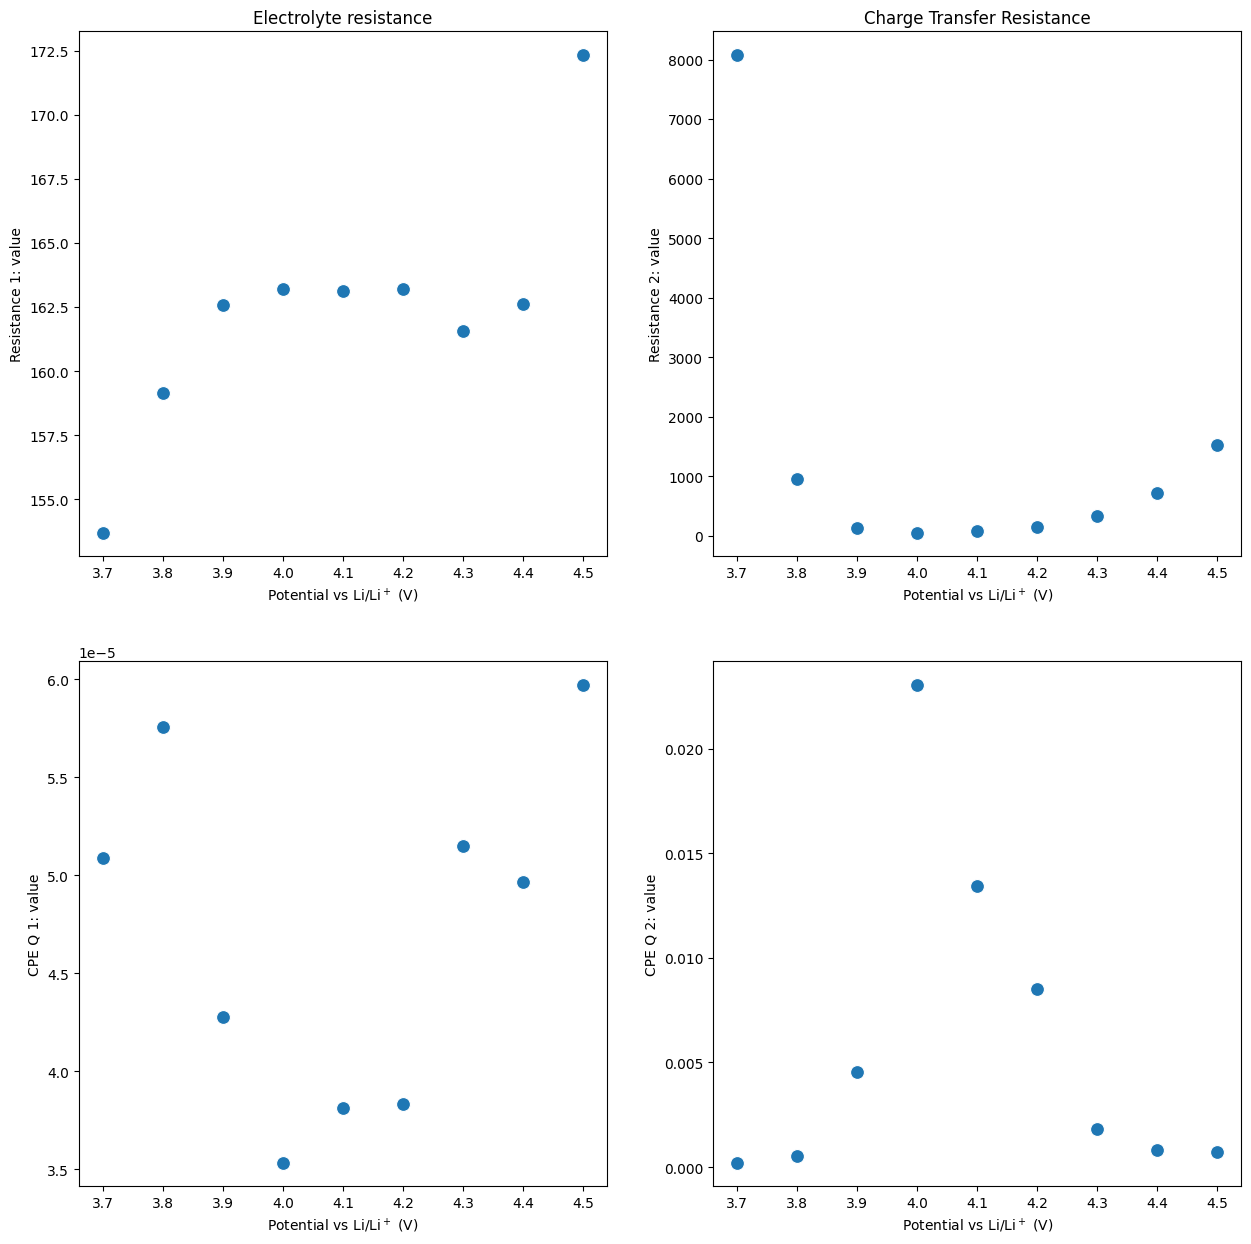

In [62]:

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\SCE_01\LMOref\EIS no OCP high stability\Relaxis Fit'

potentials = [str(i / 10) for i in range(37, 46)]
cols = ["Frequency (Hz)", "Z' ($\Omega$)", "-Z'' ($\Omega$)", "Fit Frequency (Hz)", "Fit Z' ($\Omega$)", "Fit -Z'' ($\Omega)$" ]
files = [os.path.join(path, i) for i in os.listdir(path)]
data = pd.DataFrame()
values = pd.DataFrame()
n = 0
for i in files:
    if '_spectra_' == i[-14:-5]:
        df = pd.read_csv(i, skiprows = 4, sep = '\t', names = cols)
        df[cols[2]] = df[cols[2]] * -1
        df[cols[5]] = df[cols[5]] * -1
        df['Potential vs Li/Li$^+$ (V)'] = potentials[n]
        data = pd.concat([data, df], ignore_index=True)
        n += 1
        # display(df)
    else:
        values = pd.read_csv(i, skiprows=2, sep = '\t', usecols = [13, 16, 19, 22, 25, 28, 31])
        values['Potential vs Li/Li$^+$ (V)'] = potentials
# print(potentials)

fig, ax = plt.subplots(1,2, figsize = (15, 5), dpi = 200)
sns.scatterplot(data = data, x = cols[1], y = cols[2], edgecolor = None, hue = 'Potential vs Li/Li$^+$ (V)', ax = ax[0])
sns.scatterplot(data = data, x = cols[1], y = cols[2], edgecolor = None, hue = 'Potential vs Li/Li$^+$ (V)', ax = ax[1], legend = False, s = 20)

sns.lineplot(data = data, x = cols[4], y = cols[5], hue = 'Potential vs Li/Li$^+$ (V)', ax = ax[0], legend = True )
sns.lineplot(data = data, x = cols[4], y = cols[5], hue = 'Potential vs Li/Li$^+$ (V)', ax = ax[1], legend = True )

ax[1].set_ylim(-10, 300)
ax[1].set_xlim(150, 400)

fig, ax = plt.subplots(2, 2, figsize = (15,15))
sns.scatterplot(data = values, x = 'Potential vs Li/Li$^+$ (V)', y = 'Resistance 1: value', ax = ax[0,0], s = 100)
sns.scatterplot(data = values, x = 'Potential vs Li/Li$^+$ (V)', y = 'Resistance 2: value', ax = ax[0,1], s = 100)
sns.scatterplot(data = values, x = 'Potential vs Li/Li$^+$ (V)', y = 'CPE Q 1: value', ax = ax[1,0], s = 100)
sns.scatterplot(data = values, x = 'Potential vs Li/Li$^+$ (V)', y = 'CPE Q 2: value', ax = ax[1,1], s = 100)
ax[0,0].set_title('Electrolyte resistance')
ax[0,1].set_title('Charge Transfer Resistance')
# values